## Consumer Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data
df_customer = pd.read_csv("consumers_data.csv")
df_customer.head(2)

,id,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31,35,False
1,1,65.16,male,yes,23,61,False


In [3]:
# consumer purchase behavior based on age
df_agesort = df_customer.loc[df_customer['age']>0,].groupby(["age"]).mean()
df_agesort.head(2)

,id,purch_amt,days_since_last_purch,loyalty
age,,,,
1,63797.283843,40.620175,57.148472,0.017467
2,58931.754513,43.005704,59.660650,0.057762


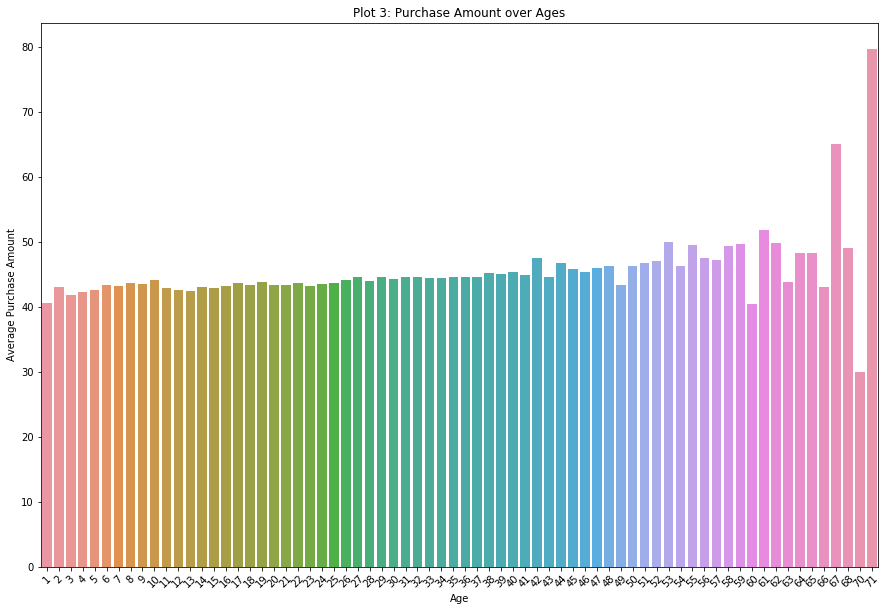

In [4]:
plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort.index, y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()

## The above plot shows that purchase amount are quite evenly distributed over ages.

In [5]:
purch_metrics = df_customer.loc[(df_customer['age']>0), ].groupby(["gender", "card_on_file"]).mean()
print(purch_metrics)

                               id  purch_amt        age  \
gender card_on_file                                       
female no            60028.324210  44.102974  25.937456   
       yes           59953.956662  43.989070  25.877520   
male   no            59888.943098  44.098311  26.060809   
       yes           60112.872738  43.982487  26.061587   

                     days_since_last_purch   loyalty  
gender card_on_file                                   
female no                        56.528434  0.166819  
       yes                       56.665550  0.165718  
male   no                        56.573098  0.168336  
       yes                       56.597172  0.168543  


In [6]:
purch_metrics_2 = df_customer.loc[(df_customer['age']>0), ].groupby(["card_on_file", "loyalty"]).mean()
print(purch_metrics_2)

                                id  purch_amt        age  \
card_on_file loyalty                                       
no           False    59963.046870  42.078983  25.224825   
             True     59934.260673  54.142603  29.847464   
yes          False    60007.003137  42.028390  25.145141   
             True     60164.921628  53.740157  30.077771   

                      days_since_last_purch  
card_on_file loyalty                         
no           False                59.943123  
             True                 39.700942  
yes          False                59.977898  
             True                 39.954400  


<Figure size 1800x1440 with 0 Axes>

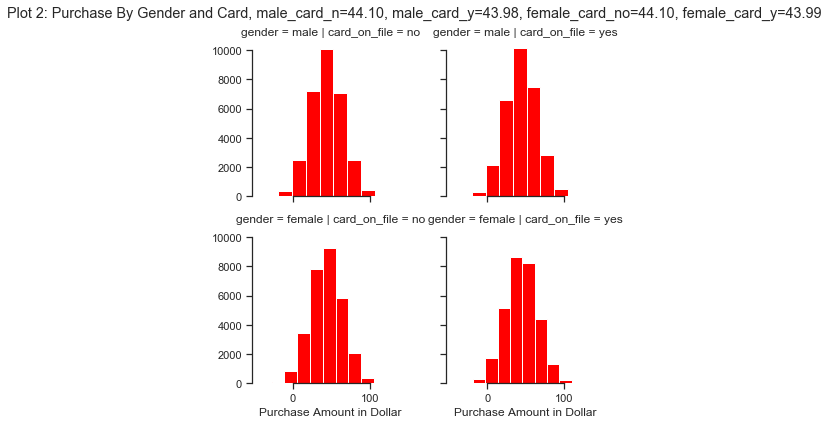

In [7]:
# purchase behavior based on gender and card_on_file
plt.figure(figsize=(25,20))
sns.set(style="ticks")
graph = sns.FacetGrid(df_customer, row="gender", col="card_on_file")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.9)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 2: Purchase By Gender and Card, male_card_n=44.10, male_card_y=43.98, female_card_no=44.10, female_card_y=43.99")
sns.despine(trim=True)
plt.show()

## Purchase behavior is dependent on with or without card_on_file

<Figure size 1800x1440 with 0 Axes>

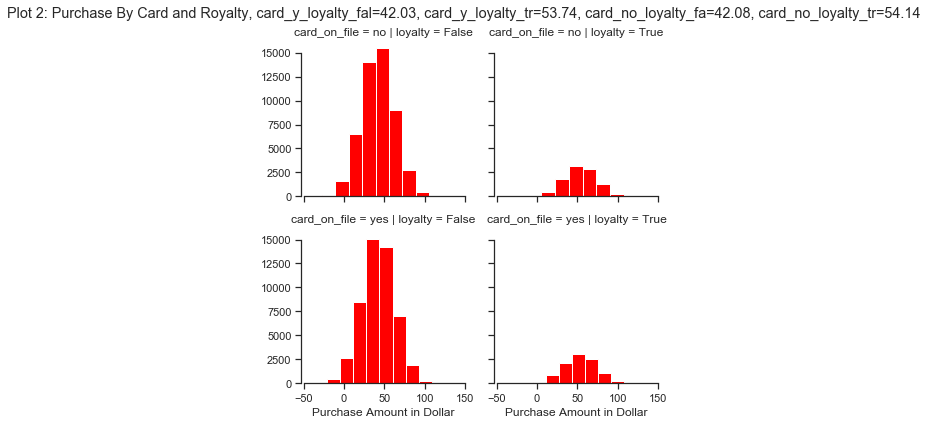

In [8]:
# purchase behavior based on gender and card_on_file
plt.figure(figsize=(25,20))
sns.set(style="ticks")
graph = sns.FacetGrid(df_customer, row="card_on_file", col="loyalty")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.9)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 2: Purchase By Card and Royalty, card_y_loyalty_fal=42.03, card_y_loyalty_tr=53.74, card_no_loyalty_fa=42.08, card_no_loyalty_tr=54.14")
sns.despine(trim=True)
plt.show()


## Purchase behavior is strongly dependent on loyalty
    loyalty significantly increases the purchase power.

<Figure size 1440x1080 with 0 Axes>

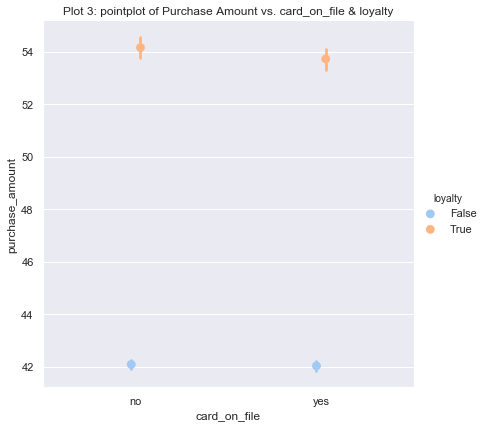

In [9]:
plt.figure(figsize=(20,15))
sns.set(style="darkgrid")
graph = sns.catplot(x='card_on_file', y='purch_amt', hue='loyalty', data=df_customer,
                        height=6, kind='point', palette='pastel', ci=95,dodge=True,join=False)
graph.despine()
graph.set_xlabels("card_on_file")
graph.set_ylabels("purchase_amount")
plt.title("Plot 3: pointplot of Purchase Amount vs. card_on_file & loyalty")
plt.show()

## The category plot shows loyalty makes big difference in customers' purchase power.